In [7]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("twitter_training.csv")

In [9]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
data.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [11]:
col_names=['ID','Entity','Sentiments','Contest']
df=pd.read_csv('twitter_training.csv', names=col_names)

In [12]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
df.shape

(74682, 4)

In [15]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [16]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [17]:
df.dropna(axis=0,inplace=True)

In [18]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(2340)

In [24]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [25]:
df.shape

(71656, 4)

In [26]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

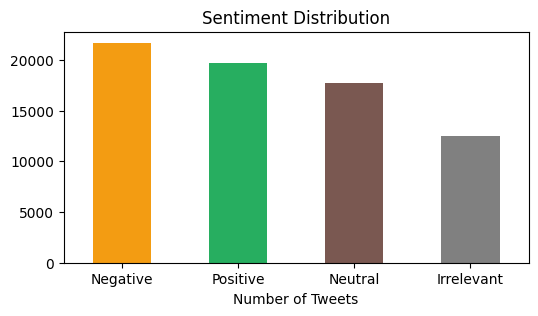

In [46]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['#f39c12','#27ae60','#7a5851','grey'])
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [40]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

Sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64

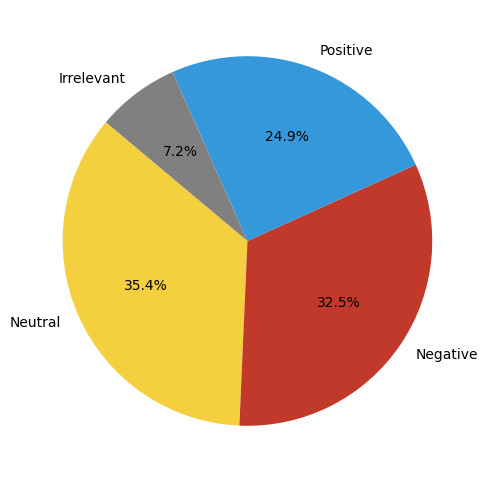

In [53]:
plt.figure(figsize=(6,6))
colors = ['#f4d03f','#c0392b','#3498db','grey']
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.1f%%',startangle=140,colors=colors)
plt.show()